In [1]:
#imports all needed libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os.path
import datetime
import openpyxl
import xlsxwriter

In [3]:
# this loads in all completed games from excel files, and puts them into a large dictionary of dataframes
#file_path = 'C:/Users/DavidCastle/Documents/School Notes/Masters Thesis/excel sheets/NEW/COMPLETE' #filepath for personal laptop
#file_path = 'C:/Users/david.castle/OneDrive - Deltatre S.p.A/Dokumente/Masters Thesis/excel sheets/NEW/COMPLETE' #filepath for work laptop
#file_path = 'D:/School Notes/Masters Thesis/excel sheets/NEW/COMPLETE' #filepath for external harddrive
file_path = r'./excel sheets/NEW/COMPLETE' #relative filepath
files=os.listdir(file_path)

all_games_data = {}

for f in files:
    Full_path = os.path.join(file_path, f)
    sheetlength = len((pd.ExcelFile(Full_path)).sheet_names)
    gamename = f[3:12]
    for sheetnumber in range(sheetlength):
        quartercounter = sheetnumber+1
        intermediatedata = pd.read_excel(Full_path,sheet_name=sheetnumber,index_col='Time')
        keystring = f"{gamename}, quarter {quartercounter}"
        all_games_data[keystring] = intermediatedata

In [4]:
#this checks if the data has loaded in correctly. not necessary
datacolumnnames = all_games_data[list(all_games_data.keys())[0]].columns
#count_of_numbers_data = pd.DataFrame(index=range(len(attack_direction_data.keys())),columns = [datacolumnnames]) this creates range that is same size as original data. It probably isnt necessary
total_count_data = pd.DataFrame(index=range(0,3),columns = [datacolumnnames])
total_count_data.index = ["Totals","Averages","Extra"]
total_count_data.iloc[2,:] = 0
for keycounter in all_games_data.keys():
    counter = 0
    for col in range(all_games_data[keycounter].shape[1]):
        if keycounter == list(all_games_data.keys())[0]:
            total_count_data.iloc[0,col] = 0
        total_count_data.iloc[0,col] += sum(all_games_data[keycounter].iloc[:,col].value_counts().tolist())
    for row in range(len(all_games_data[keycounter])):
        for col in range(2,14):
            if all_games_data[keycounter].iloc[row,col] == 1.0 or all_games_data[keycounter].iloc[row,col] == 2.0:
                if counter == 0:
                    index_intermediate = 0
                    counter = 1
                total_count_data.iloc[2,col] += (row - index_intermediate)
                total_count_data.iloc[2,0] += 1
                index_intermediate = row
                
total_count_data.iloc[2,1] = sum(total_count_data.iloc[2,2:14])

In [5]:
#This section is to adjust the data points to be based on attack direction, rather than field side

attack_direction_data = {}
na_value = all_games_data['UNC - MON, quarter 1'].iloc[0,1]
for keycounter in all_games_data.keys():
    team1_attack_direction = all_games_data[keycounter].iloc[1,20]
    team2_attack_direction = all_games_data[keycounter].iloc[1,21]
    team1_intermediate_data = all_games_data[keycounter].copy()
    team1_intermediate_data = team1_intermediate_data.replace(2.0,na_value)
    team2_intermediate_data = all_games_data[keycounter].copy()
    team2_intermediate_data = team2_intermediate_data.replace(1.0,na_value)
    
    if team1_attack_direction == 'L':
        team1_intermediate_data.columns = team1_intermediate_data.columns.str.replace("LH","A",regex=False)
        team1_intermediate_data.columns = team1_intermediate_data.columns.str.replace("RH","D",regex=False)
        team1_intermediate_data.columns = team1_intermediate_data.columns.str.replace("F","R",regex=False)
        team1_intermediate_data.columns = team1_intermediate_data.columns.str.replace("N","L",regex=False)
        team1_intermediate_data = team1_intermediate_data.drop(labels=['Team 1','Team 2'], axis=1)
        team1_column_names = team1_intermediate_data.columns.tolist()
        team1_column_names = team1_column_names[:2] + team1_column_names[14:] + team1_column_names[7:5:-1] + team1_column_names[5:3:-1] + team1_column_names[3:1:-1] + team1_column_names[9:7:-1] + team1_column_names[11:9:-1] + team1_column_names[13:11:-1]
        team1_intermediate_data = team1_intermediate_data[team1_column_names]
    else:
        team1_intermediate_data.columns = team1_intermediate_data.columns.str.replace("RH","A",regex=False)
        team1_intermediate_data.columns = team1_intermediate_data.columns.str.replace("LH","D",regex=False)
        team1_intermediate_data.columns = team1_intermediate_data.columns.str.replace("F","L",regex=False)
        team1_intermediate_data.columns = team1_intermediate_data.columns.str.replace("N","R",regex=False)
        team1_intermediate_data = team1_intermediate_data.drop(labels=['Team 1','Team 2'], axis=1)
        team1_column_names = team1_intermediate_data.columns.tolist()
        team1_column_names = team1_column_names[:2] + team1_column_names[14:] + team1_column_names[8:14] + team1_column_names[6:8] + team1_column_names[4:6] + team1_column_names[2:4]
        team1_intermediate_data = team1_intermediate_data[team1_column_names]
        
    if team2_attack_direction == 'L':
        team2_intermediate_data.columns = team2_intermediate_data.columns.str.replace("LH","A",regex=False)
        team2_intermediate_data.columns = team2_intermediate_data.columns.str.replace("RH","D",regex=False)
        team2_intermediate_data.columns = team2_intermediate_data.columns.str.replace("F","R",regex=False)
        team2_intermediate_data.columns = team2_intermediate_data.columns.str.replace("N","L",regex=False)
        team2_intermediate_data = team2_intermediate_data.drop(labels=['Team 1','Team 2'], axis=1)
        team2_column_names = team2_intermediate_data.columns.tolist()
        team2_column_names = team2_column_names[:2] + team2_column_names[14:] + team2_column_names[7:5:-1] + team2_column_names[5:3:-1] + team2_column_names[3:1:-1] + team2_column_names[9:7:-1] + team2_column_names[11:9:-1] + team2_column_names[13:11:-1]
        team2_intermediate_data = team2_intermediate_data[team1_column_names]

    else:
        team2_intermediate_data.columns = team2_intermediate_data.columns.str.replace("RH","A",regex=False)
        team2_intermediate_data.columns = team2_intermediate_data.columns.str.replace("LH","D",regex=False)
        team2_intermediate_data.columns = team2_intermediate_data.columns.str.replace("F","L",regex=False)
        team2_intermediate_data.columns = team2_intermediate_data.columns.str.replace("N","R",regex=False)
        team2_intermediate_data = team2_intermediate_data.drop(labels=['Team 1','Team 2'], axis=1)
        team2_column_names = team2_intermediate_data.columns.tolist()
        team2_column_names = team2_column_names[:2] + team2_column_names[14:] + team2_column_names[8:14] + team2_column_names[6:8] + team2_column_names[4:6] + team2_column_names[2:4]
        team2_intermediate_data = team2_intermediate_data[team2_column_names]
        
    team1_intermediate_data.update(team2_intermediate_data)
    attack_direction_data[f"{keycounter}"] = team1_intermediate_data

In [6]:
# this section is to find basic statistics, such as number of goals, avg goals, shots, etc
datacolumnnames = attack_direction_data[list(attack_direction_data.keys())[0]].columns
count_of_numbers_data = pd.DataFrame(index=range(0,6),columns = [datacolumnnames])
count_of_numbers_data.iloc[0:6,0:20] = 0
count_of_numbers_data.index = ["Totals","Averages","Time(s)","Time(m)","Time(s) Avg","Time(m) Avg"]

for keycounter in attack_direction_data.keys():
    counter = 0
    for col in range(attack_direction_data[keycounter].shape[1]):
        if keycounter == list(attack_direction_data.keys())[0]:
            count_of_numbers_data.iloc[0,col] = 0
        if len(attack_direction_data[keycounter].iloc[:,col].value_counts().tolist()) == 0:
            count_of_numbers_data.iloc[0,col] += 0
        else:
            count_of_numbers_data.iloc[0,col] += sum(attack_direction_data[keycounter].iloc[:,col].value_counts().tolist())
    #below section find total time spent in each section. For some reason it is doubling the time.
    for row in range(len(attack_direction_data[keycounter])):
        for col in range(8,20):
            if attack_direction_data[keycounter].iloc[row,col] == 1.0 or attack_direction_data[keycounter].iloc[row,col] == 2.0:
                if counter == 0:
                    index_intermediate = row
                    col_intermediate = col
                    counter = 1
                if row - index_intermediate < 81:
                    count_of_numbers_data.iloc[2,col_intermediate] += (row - index_intermediate)
                #count_of_numbers_data.iloc[2,5] += (row - index_intermediate)
                #print(count_of_numbers_data.iloc[2,col],row,col,index_intermediate)
                index_intermediate = row
                col_intermediate = col
#below section creates averages of above calculated values
count_of_numbers_data.iloc[1,:] = count_of_numbers_data.iloc[0,:]/(len(attack_direction_data.keys())/4)
count_of_numbers_data.iloc[2,7] = sum(count_of_numbers_data.iloc[2,8:20])
count_of_numbers_data.iloc[3,8:20] = count_of_numbers_data.iloc[2,8:20]/60
count_of_numbers_data.iloc[3,7] = sum(count_of_numbers_data.iloc[3,8:20])
count_of_numbers_data.iloc[4,8:20] = count_of_numbers_data.iloc[2,8:20]/(len(attack_direction_data.keys())/4)
count_of_numbers_data.iloc[4,7] = sum(count_of_numbers_data.iloc[4,8:20])
count_of_numbers_data.iloc[5,8:20] = count_of_numbers_data.iloc[3,8:20]/(len(attack_direction_data.keys())/4)
count_of_numbers_data.iloc[5,7] = sum(count_of_numbers_data.iloc[5,8:20])
count_of_numbers_data.round(decimals = 2)


,faceoff,possession,shot,goal,shotclock reset,turnover,penalty,man up offense,AOBL,AOBR,AIGL,AIGR,ABGL,ABGR,DOBL,DOBR,DIGL,DIGR,DBGL,DBGR
Totals,227.00,701.00,659.00,202.00,37.00,201.00,134.00,82.00,1021.00,1062.00,1395.00,1403.00,872.00,875.00,269.00,267.00,321.00,288.00,145.00,112.00
Averages,28.38,87.62,82.38,25.25,4.62,25.12,16.75,10.25,127.62,132.75,174.38,175.38,109.00,109.38,33.62,33.38,40.12,36.00,18.12,14.00
Time(s),0.00,0.00,0.00,0.00,0.00,0.00,0.00,28581.00,3969.00,4053.00,5701.00,5382.00,2665.00,2789.00,729.00,694.00,1009.00,880.00,401.00,309.00
Time(m),0.00,0.00,0.00,0.00,0.00,0.00,0.00,476.35,66.15,67.55,95.02,89.70,44.42,46.48,12.15,11.57,16.82,14.67,6.68,5.15
Time(s) Avg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3572.62,496.12,506.62,712.62,672.75,333.12,348.62,91.12,86.75,126.12,110.00,50.12,38.62
Time(m) Avg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,59.54,8.27,8.44,11.88,11.21,5.55,5.81,1.52,1.45,2.10,1.83,0.84,0.64


In [7]:
#finds index of goal, searches some defined time interval before the goal til the index of the goal, recording all zones leading up to the goal.
intermediate_goalsearch_data = {}
goalcounter = 0
zones_before_goal_avg = 0
time_before_goal = 60
for keycounter in attack_direction_data.keys():
    goalindex = np.concatenate((np.where(attack_direction_data[keycounter]['goal'] == 1.0)[0], np.where(attack_direction_data[keycounter]['goal'] == 2.0)[0]), axis = 0)
    goalindex.sort(kind='mergesort')
    if len(goalindex) > 0:
        for goalrow in goalindex:
            list_goalsearch_data = []
            goalcounter += 1
            if goalrow > time_before_goal-1:
                goalstartcount = goalrow - time_before_goal
            else:
                goalstartcount = 0
            for i in range(goalstartcount, goalrow+1):
                for col in range(8,20):
                    if attack_direction_data[keycounter].iloc[i,col] == 1.0 or attack_direction_data[keycounter].iloc[i,col] == 2.0 :
                        list_goalsearch_data.append(col)   
            intermediate_goalsearch_data[f"{goalcounter}"] = list_goalsearch_data
            zones_before_goal_avg += len(intermediate_goalsearch_data[f"{goalcounter}"])
            
zones_before_goal_avg = zones_before_goal_avg/len(list(intermediate_goalsearch_data.keys()))

In [8]:
#finds index of turnover, searches some defined time interval before the turnover til the index of the turnover, recording all zones leading up to the turnover.
intermediate_turnoversearch_data = {}
turnovercounter = 0
zones_before_turnover_avg = 0
time_before_turnover = 60
for keycounter in attack_direction_data.keys():
    turnoverindex = np.concatenate((np.where(attack_direction_data[keycounter]['turnover'] == 1.0)[0], np.where(attack_direction_data[keycounter]['turnover'] == 2.0)[0]), axis = 0)
    turnoverindex.sort(kind='mergesort')
    if len(turnoverindex) > 0:
        for turnoverrow in turnoverindex:
            list_turnoversearch_data = []
            turnovercounter += 1
            if turnoverrow > time_before_turnover-1:
                turnoverstartcount = turnoverrow - time_before_turnover
            else:
                turnoverstartcount = 0
            for ii in range(turnoverstartcount, turnoverrow+1):
                for turnovercol in range(8,20):
                    if attack_direction_data[keycounter].iloc[ii,turnovercol] == 1.0 or attack_direction_data[keycounter].iloc[ii,turnovercol] == 2.0 :
                        list_turnoversearch_data.append(turnovercol)
            intermediate_turnoversearch_data[f"{turnovercounter}"] = list_turnoversearch_data
            zones_before_turnover_avg += len(intermediate_turnoversearch_data[f"{turnovercounter}"])
            
zones_before_turnover_avg = zones_before_turnover_avg/len(list(intermediate_turnoversearch_data.keys()))

In [9]:
#This section creates a matrix that analyzes what zones led up to a goal, and how many of those zones led to goals
def GetDictElementMaxLength(ExDict):        
    LongestElement=max(ExDict, key=lambda k: len(ExDict[k]))
    return len(ExDict[LongestElement])

goal_datalength = GetDictElementMaxLength(intermediate_goalsearch_data)
goal_datacolumnnames = attack_direction_data[list(attack_direction_data.keys())[0]].columns[7:]
goal_scored_location = pd.DataFrame(index=range(0,goal_datalength),columns = [goal_datacolumnnames])
goal_scored_location = goal_scored_location.rename(columns={"man up offense":"Total Goals"})
goal_scored_location.iloc[0:,0:20] = 0
for keycounter in intermediate_goalsearch_data.keys():
    for row in reversed(range(len(intermediate_goalsearch_data[keycounter]))):
        goal_row = abs(row-len(intermediate_goalsearch_data[keycounter])+1)
        intermediate_goal_scored_location = intermediate_goalsearch_data[keycounter][row]
        goal_scored_location.iloc[goal_row,intermediate_goal_scored_location-7] += 1

for row in range(len(goal_scored_location)):
        goal_scored_location.iloc[row,0] = sum(goal_scored_location.iloc[row,1:])

In [10]:
#This section creates a matrix that analyzes what zones led up to a turnover
def GetDictElementMaxLength(ExDict):        
    LongestElement=max(ExDict, key=lambda k: len(ExDict[k]))
    return len(ExDict[LongestElement])

turnover_datalength = GetDictElementMaxLength(intermediate_turnoversearch_data)
turnover_datacolumnnames = attack_direction_data[list(attack_direction_data.keys())[0]].columns[7:]
turnover_scored_location = pd.DataFrame(index=range(0,turnover_datalength),columns = [turnover_datacolumnnames])
turnover_scored_location = turnover_scored_location.rename(columns={"man up offense":"Total turnovers"})
turnover_scored_location.iloc[0:,0:20] = 0
for keycounter in intermediate_turnoversearch_data.keys():
    for row in reversed(range(len(intermediate_turnoversearch_data[keycounter]))):
        turnover_row = abs(row-len(intermediate_turnoversearch_data[keycounter])+1)
        intermediate_turnover_scored_location = intermediate_turnoversearch_data[keycounter][row]
        turnover_scored_location.iloc[turnover_row,intermediate_turnover_scored_location-7] += 1

for row in range(len(turnover_scored_location)):
        turnover_scored_location.iloc[row,0] = sum(turnover_scored_location.iloc[row,1:])

In [11]:
dflist= [total_count_data, goal_scored_location, turnover_scored_location]
Excelwriter = pd.ExcelWriter("analysis_data.xlsx",engine="xlsxwriter")

#We now loop process the list of dataframes
for i, df in enumerate (dflist):
    df.to_excel(Excelwriter, sheet_name="Sheet" + str(i+1))
#And finally save the file
Excelwriter.save()

(0.0, 55.0)

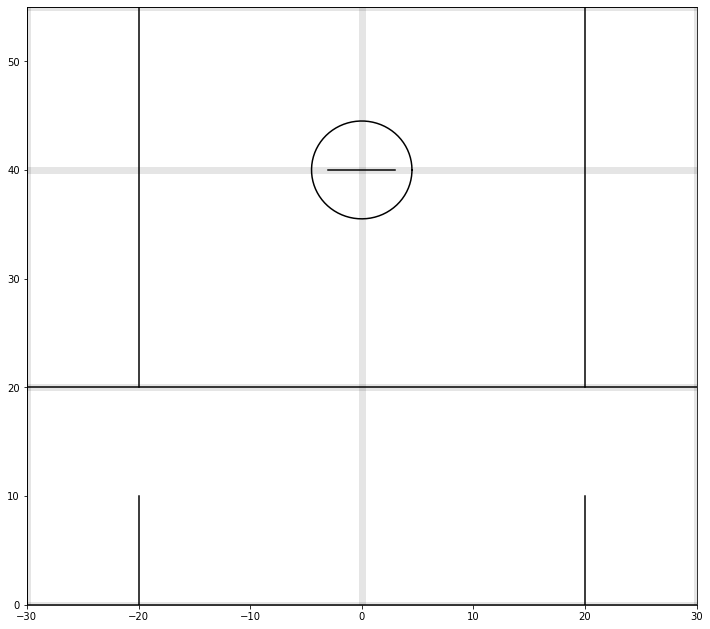

In [12]:
#This creates a diagram of the pitch with the zones

lengthofpitch = 55 #only positive
widthofpitch = 30 # + & -
restrainingline = 35 #y height
boxline = 20 #x width
wingwidth = 10 #y height
wingposition = 20 #x width
goalline = 15 #y height
goalwidth = 6 #xwidth
circleradius = 9 #radius of circle around goal

angle = np.linspace( 0 , 2 * np.pi , 150 ) 
circx = (circleradius/2) * np.cos( angle ) 
circy = (lengthofpitch-goalline)+((circleradius/2) * np.sin( angle ))

fig, ax = plt.subplots(1, figsize=(12,11))

ax.axhline(y = lengthofpitch - restrainingline, color='k')
ax.axhline(y = 0, color='k')
ax.axhline(y = lengthofpitch, color = 'k')
ax.axhline(y = (lengthofpitch-restrainingline),color = 'k',alpha = 0.1, linewidth= 7)
ax.axhline(y = (lengthofpitch-goalline), color = 'k',alpha = 0.1, linewidth = 7)
ax.axhline(y = 0, color = 'k',alpha = 0.1, linewidth = 7)
ax.axhline(y = lengthofpitch, color = 'k',alpha = 0.1, linewidth = 7)

ax.axvline(x = boxline, ymin = 1-(restrainingline/lengthofpitch), color='k')
ax.axvline(x = -boxline, ymin = 1-(restrainingline/lengthofpitch), color='k')
ax.axvline(x = wingposition,ymax = (wingwidth/lengthofpitch), color='k')
ax.axvline(x = -wingposition, ymax = (wingwidth/lengthofpitch), color='k')
ax.axvline(x = -widthofpitch, color = 'k')
ax.axvline(x = -widthofpitch, color = 'k')
ax.axvline(x = 0, color = 'k',alpha = 0.1, linewidth = 7)
ax.axvline(x = -widthofpitch, color = 'k',alpha = 0.1, linewidth = 7)
ax.axvline(x = widthofpitch, color = 'k',alpha = 0.1, linewidth = 7)

ax.plot([-(goalwidth/2),(goalwidth/2)],[(lengthofpitch-goalline),(lengthofpitch-goalline)],color='k')
ax.plot(circx, circy, color = 'k')


ax.set_xlim([-widthofpitch, widthofpitch])
ax.set_ylim([0, lengthofpitch])

In [30]:
intermediate_goalsearch_data["3"]

[13, 12, 13, 12, 10, 18, 16, 14, 8, 10, 12, 13, 12, 10, 8, 9, 11, 8, 10, 11]

In [45]:
attack_direction_data[list(attack_direction_data.keys())[0]]

,faceoff,possession,shot,goal,shotclock reset,turnover,penalty,man up offense,AOBL,AOBR,AIGL,AIGR,ABGL,ABGR,DOBL,DOBR,DIGL,DIGR,DBGL,DBGR
Time,,,,,,,,,,,,,,,,,,,,
00:15:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:14:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:14:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:14:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:14:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:00:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
